# Exploratory Dataset Analysis - Data_Negara_HELP

# A. Introduction

Name: **Kenang Ghalih Diasthama** 

## Objective

Untuk mengkategorikan negara menggunakan faktor sosial ekonomi dan kesehatan yang menentukan pembangunan negara secara keseluruhan.

## Tentang Organisasi:

HELP International adalah LSM kemanusiaan internasional yang berkomitmen untuk memerangi kemiskinan dan menyediakan fasilitas dan bantuan dasar bagi masyarakat di negara-negara terbelakang saat terjadi bencana dan bencana alam.

## Permasalahan:

HELP International telah berhasil mengumpulkan sekitar $ 10 juta. Saat ini, CEO LSM perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Jadi, CEO harus mengambil keputusan untuk memilih negara yang paling membutuhkan bantuan. Oleh karena itu, Tugas teman-teman  adalah mengkategorikan negara menggunakan beberapa faktor sosial ekonomi dan kesehatan yang menentukan perkembangan negara secara keseluruhan. Kemudian kalian perlu menyarankan negara mana saja  yang paling perlu menjadi fokus CEO.

## Penjelasan kolom Features:

* Negara : Nama negara
* Kematian_anak: Kematian anak di bawah usia 5 tahun per 1000 kelahiran
* Ekspor : Ekspor barang dan jasa perkapita
* Kesehatan: Total pengeluaran kesehatan perkapita
* Impor: Impor barang dan jasa perkapita
* Pendapatan: Penghasilan bersih perorang
* Inflasi: Pengukuran tingkat pertumbuhan tahunan dari Total GDP 
* Harapan_hidup: Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama
* Jumlah_fertiliti: Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama
* GDPperkapita: GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi. 

## Penentuan pengambilan 2 Features 'Data_Negara_HELP.csv'

Disini saya memilih features GDPperkapita dan Kematian anak untuk clustering kemudian dilihat apakah keterkaitan diantara data features tersebut. Namun, clustering tidak bisa dilakukan karena harus mengecek data apakah memiliki outlier dan missing value. Maka, dilakukan tahapan-tahapan berikut:

# B. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import skew

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

plt.style.use("ggplot")

# C. Load Dataset

## Melihat dataset yang sudah diimport

In [2]:
data = pd.read_csv('Data_Negara_HELP.csv')
data

Negara  Kematian_anak  Ekspor  Kesehatan  Impor  Pendapatan  \
0            Afghanistan           90.2    10.0       7.58   44.9        1610   
1                Albania           16.6    28.0       6.55   48.6        9930   
2                Algeria           27.3    38.4       4.17   31.4       12900   
3                 Angola          119.0    62.3       2.85   42.9        5900   
4    Antigua and Barbuda           10.3    45.5       6.03   58.9       19100   
..                   ...            ...     ...        ...    ...         ...   
162              Vanuatu           29.2    46.6       5.25   52.7        2950   
163            Venezuela           17.1    28.5       4.91   17.6       16500   
164              Vietnam           23.3    72.0       6.84   80.2        4490   
165                Yemen           56.3    30.0       5.18   34.4        4480   
166               Zambia           83.1    37.0       5.89   30.9        3280   

     Inflasi  Harapan_hidup  Jumlah_fertiliti  GDPperkapita  
0       9.44           56.2              5.82           553  
1       4.49           76.3              1.65          4090  
2      16.10           76.5              2.89          4460  
3      22.40           60.1              6.16          3530  
4       1.44           76.8              2.13         12200  
..       ...            ...               ...           ...  
162     2.62           63.0              3.50          2970  
163    45.90           75.4              2.47         13500  
164    12.10           73.1              1.95          1310  
165    23.60           67.5              4.67          1310  
166    14.00           52.0              5.40          1460  

[167 rows x 10 columns]

In [3]:
df = data.copy()
df.head()

Negara  Kematian_anak  Ekspor  Kesehatan  Impor  Pendapatan  \
0          Afghanistan           90.2    10.0       7.58   44.9        1610   
1              Albania           16.6    28.0       6.55   48.6        9930   
2              Algeria           27.3    38.4       4.17   31.4       12900   
3               Angola          119.0    62.3       2.85   42.9        5900   
4  Antigua and Barbuda           10.3    45.5       6.03   58.9       19100   

   Inflasi  Harapan_hidup  Jumlah_fertiliti  GDPperkapita  
0     9.44           56.2              5.82           553  
1     4.49           76.3              1.65          4090  
2    16.10           76.5              2.89          4460  
3    22.40           60.1              6.16          3530  
4     1.44           76.8              2.13         12200

## Menampilkan informasi dataset mengenai columns, data type, dan missing value

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.columns

Index(['Negara', 'Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan',
       'Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita'],
      dtype='object')

In [6]:
# Python code to convert all string
# from uppercase to lowercase.
 
# Using map function
out = map(lambda x:x.lower(), ['Negara', 'Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan',
       'Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita'])
 
# Converting it into list
output = list(out)
 
# printing output
print(output)

['negara', 'kematian_anak', 'ekspor', 'kesehatan', 'impor', 'pendapatan', 'inflasi', 'harapan_hidup', 'jumlah_fertiliti', 'gdpperkapita']


In [7]:
df.describe().T

count          mean           std       min       25%  \
Kematian_anak     167.0     38.270060     40.328931    2.6000     8.250   
Ekspor            167.0     41.108976     27.412010    0.1090    23.800   
Kesehatan         167.0      6.815689      2.746837    1.8100     4.920   
Impor             167.0     46.890215     24.209589    0.0659    30.200   
Pendapatan        167.0  17144.688623  19278.067698  609.0000  3355.000   
Inflasi           167.0      7.781832     10.570704   -4.2100     1.810   
Harapan_hidup     167.0     70.555689      8.893172   32.1000    65.300   
Jumlah_fertiliti  167.0      2.947964      1.513848    1.1500     1.795   
GDPperkapita      167.0  12964.155689  18328.704809  231.0000  1330.000   

                      50%       75%        max  
Kematian_anak       19.30     62.10     208.00  
Ekspor              35.00     51.35     200.00  
Kesehatan            6.32      8.60      17.90  
Impor               43.30     58.75     174.00  
Pendapatan        9960.00  22800.00  125000.00  
Inflasi              5.39     10.75     104.00  
Harapan_hidup       73.10     76.80      82.80  
Jumlah_fertiliti     2.41      3.88       7.49  
GDPperkapita      4660.00  14050.00  105000.00

# D. Eksplorasi Data

## Cek distribusi masing-masing kolom pada dataset.

In [8]:
obj_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()

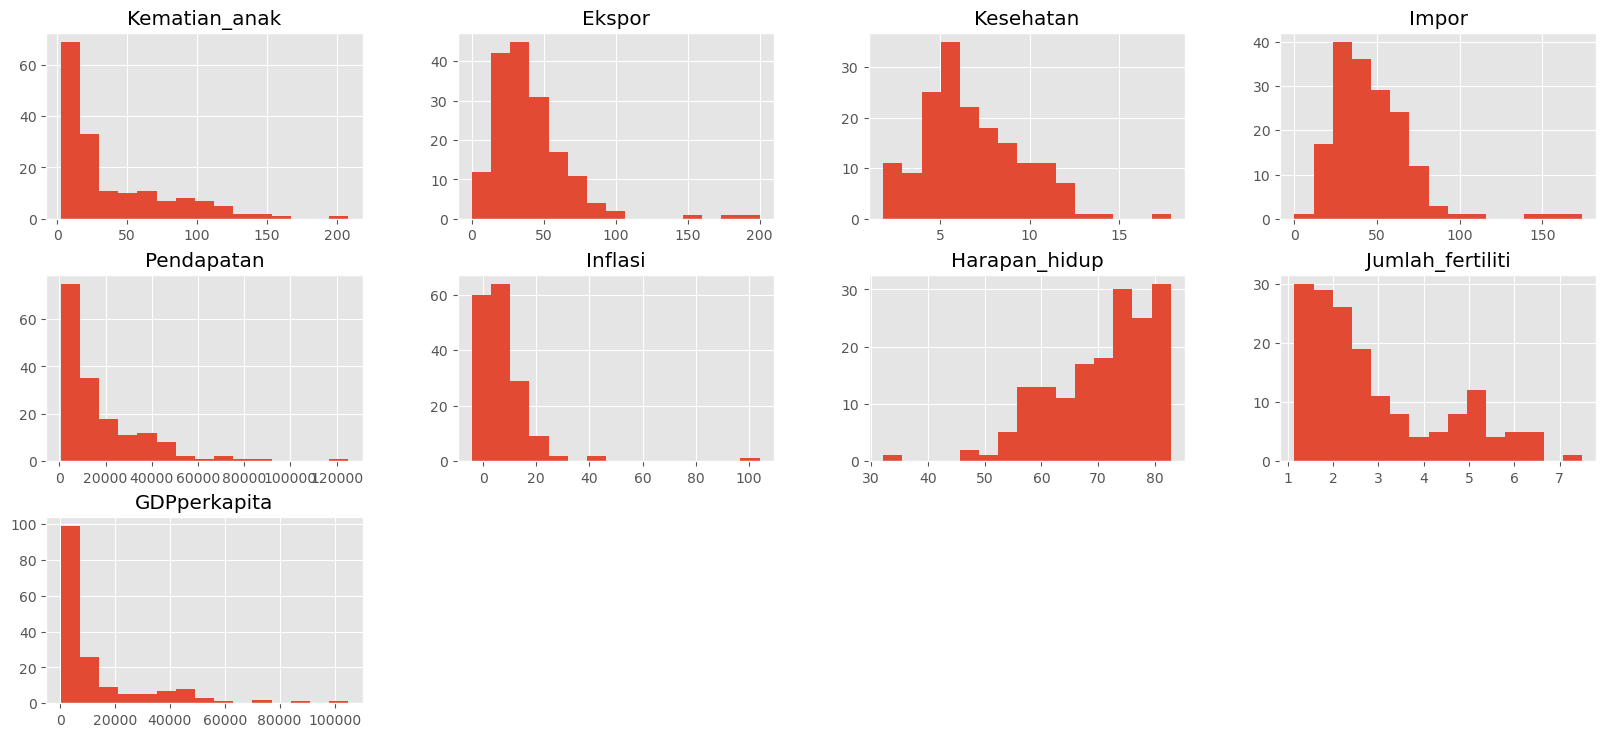

In [9]:
df[num_cols].hist(bins=15, figsize=(20, 15), layout=(5, 4));

Visualisasi histogram pada tiap kolom diatas beragam tiap data features.

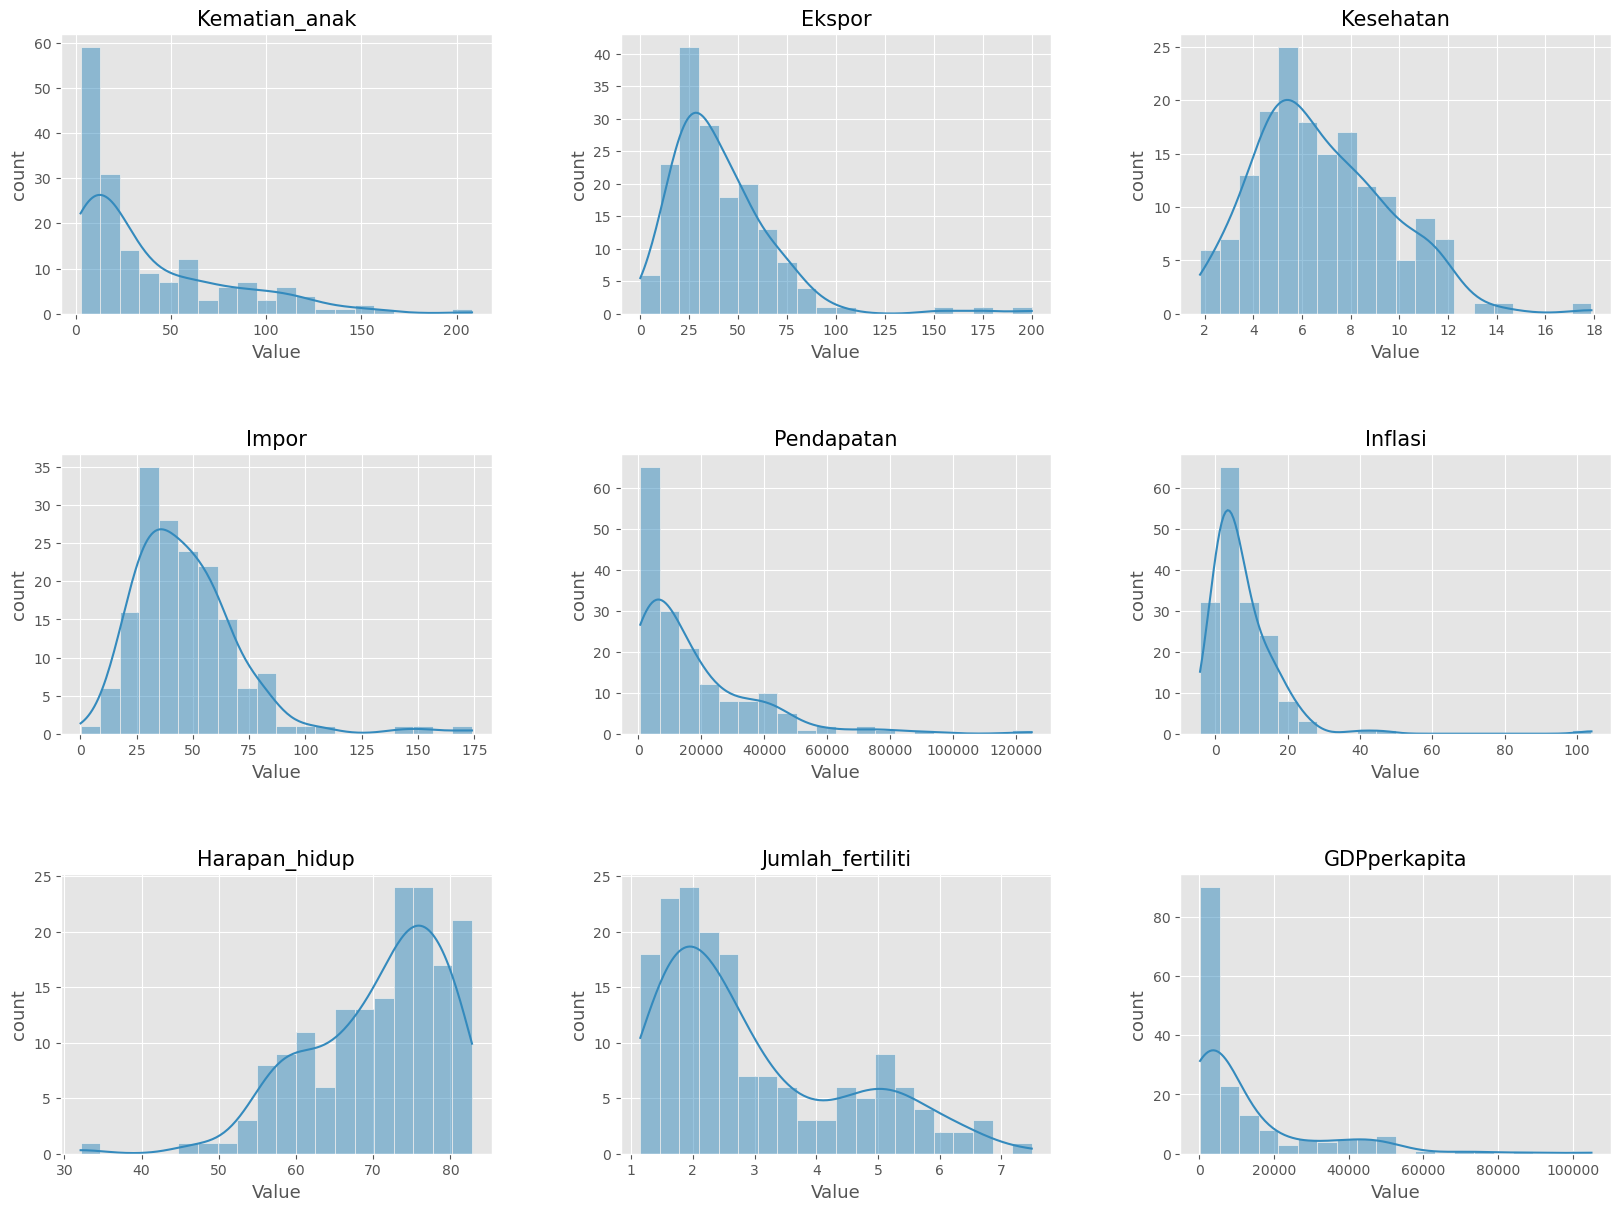

In [10]:
var_col = ['Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan',
       'Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita']
intr_cols = ['kematian_anak', 'ekspor', 'kesehatan', 'impor', 
             'pendapatan', 'inflasi', 'harapan_hidup', 'jumlah_fertiliti', 'gdpperkapita']
plt.figure(figsize=(20,20))
for i, col in enumerate(var_col):
    plt.subplot(4,3,i+1)
    plt.title(col, fontsize=15)
    plt.xlabel("Value", fontsize=13)
    plt.ylabel("count", fontsize=13)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.histplot(data=df, x=col, bins=20, kde=True)

Semua fitur diatas terlihat memiliki distribusi yang tidak normal, distribusi data tersebut mengalami skewness

### Korelasi masing-masing variabel

In [11]:
df.corr()

Kematian_anak    Ekspor  Kesehatan     Impor  Pendapatan  \
Kematian_anak          1.000000 -0.318093  -0.200402 -0.127211   -0.524315   
Ekspor                -0.318093  1.000000  -0.114408  0.737381    0.516784   
Kesehatan             -0.200402 -0.114408   1.000000  0.095717    0.129579   
Impor                 -0.127211  0.737381   0.095717  1.000000    0.122406   
Pendapatan            -0.524315  0.516784   0.129579  0.122406    1.000000   
Inflasi                0.288276 -0.107294  -0.255376 -0.246994   -0.147756   
Harapan_hidup         -0.886676  0.316313   0.210692  0.054391    0.611962   
Jumlah_fertiliti       0.848478 -0.320011  -0.196674 -0.159048   -0.501840   
GDPperkapita          -0.483032  0.418725   0.345966  0.115498    0.895571   

                   Inflasi  Harapan_hidup  Jumlah_fertiliti  GDPperkapita  
Kematian_anak     0.288276      -0.886676          0.848478     -0.483032  
Ekspor           -0.107294       0.316313         -0.320011      0.418725  
Kesehatan        -0.255376       0.210692         -0.196674      0.345966  
Impor            -0.246994       0.054391         -0.159048      0.115498  
Pendapatan       -0.147756       0.611962         -0.501840      0.895571  
Inflasi           1.000000      -0.239705          0.316921     -0.221631  
Harapan_hidup    -0.239705       1.000000         -0.760875      0.600089  
Jumlah_fertiliti  0.316921      -0.760875          1.000000     -0.454910  
GDPperkapita     -0.221631       0.600089         -0.454910      1.000000

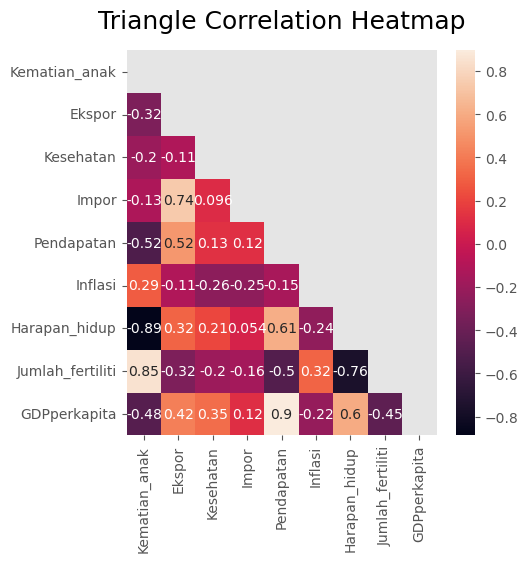

In [12]:
plt.figure(figsize=(5, 5))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), annot=True, mask=mask)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Variabel-variabel yang berkorelasi tinggi tidak berguna untuk algoritma segmentasi karena mereka merepresentasikan karakteristik yang sama dari sebuah segmen.

Variabel atau fitur yang memiliki korelasi tinggi yaitu Pendapatan dan GDPperkapita dengan skor 0.9, Kematian_anak dan Jumlah_fertiliti dengan skor 0.85, Ekspor dan Impor dengan skor 0.74.

>Oleh karena itu, dipilihlah features GDP perkapita dan Kematian anak untuk di explore untuk mendapatkan insight dari segi ekonomi dan kesehatan suatu negara.

Dapat terlihat korelasi antar kesehatan dan kematian anak, semakin kecil nilai kesehatan maka umumnya akan menyebabkan kematian anak lebih banyak

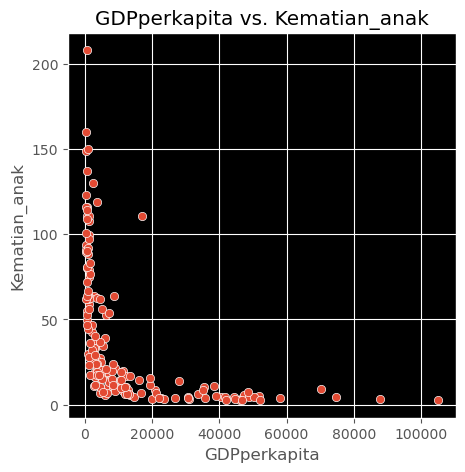

In [13]:
#membandingkan Pendapatan dan Kematian_anak
plt.figure(figsize=(5,5))
ax = plt.axes() 
ax.set_facecolor('black') 
g = sns.scatterplot(x='GDPperkapita', y='Kematian_anak', data=df)
g.set_title('GDPperkapita vs. Kematian_anak')
plt.show()

Dapat terlihat korelasi antar Pendapatan dan kematian anak, semakin kecil angka GDPperkapita maka terjadi lonjakan angka kematian pada anak

# E. Data Cleaning


## Handling missing value

### Memeriksa jumlah missing value dan menanganinya pada dataset.

In [14]:
df.isnull().sum().sort_values(ascending=False)

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

In [15]:
df.isnull().sum().sum()

0

### Cek keberadaan duplikasi data

In [16]:
df[df.duplicated()].sum()

Negara              0.0
Kematian_anak       0.0
Ekspor              0.0
Kesehatan           0.0
Impor               0.0
Pendapatan          0.0
Inflasi             0.0
Harapan_hidup       0.0
Jumlah_fertiliti    0.0
GDPperkapita        0.0
dtype: float64

In [17]:
df.duplicated().sum()

0

Hasilnya missing value serta duplikasi pada dataset sudah tidak ditemukan.

### Cek unique value berdasarkan kolom pada dataset

In [18]:
unique_val = df.nunique().sort_values(ascending=False)
unique_val = pd.DataFrame(unique_val, columns = ["Count"])
unique_val

Count
Negara              167
GDPperkapita        157
Pendapatan          156
Inflasi             156
Impor               151
Ekspor              147
Kesehatan           147
Kematian_anak       139
Jumlah_fertiliti    138
Harapan_hidup       127

**finding how much unique values every data features**

In [19]:
for val in df.columns:
    print(val,': ')
    print(df[val].value_counts())
    print("  ")

Negara : 
Afghanistan    1
Morocco        1
Myanmar        1
Namibia        1
Nepal          1
              ..
Georgia        1
Germany        1
Ghana          1
Greece         1
Zambia         1
Name: Negara, Length: 167, dtype: int64
  
Kematian_anak : 
4.5      4
3.2      3
24.1     3
4.2      3
111.0    3
        ..
55.2     1
19.2     1
29.1     1
25.1     1
83.1     1
Name: Kematian_anak, Length: 139, dtype: int64
  
Ekspor : 
23.8    3
35.0    3
37.0    2
12.4    2
14.9    2
       ..
85.8    1
21.3    1
27.9    1
22.7    1
30.0    1
Name: Ekspor, Length: 147, dtype: int64
  
Kesehatan : 
5.07    3
5.20    3
6.91    2
9.01    2
5.25    2
       ..
2.66    1
4.48    1
4.66    1
8.06    1
5.89    1
Name: Kesehatan, Length: 147, dtype: int64
  
Impor : 
28.0    2
49.6    2
26.8    2
51.3    2
63.6    2
       ..
68.7    1
23.3    1
46.6    1
26.6    1
30.9    1
Name: Impor, Length: 151, dtype: int64
  
Pendapatan : 
28300    2
36200    2
1390     2
28700    2
15400    2
        ..

# F. Handling outliers

### Boxplot features sebelum di handling outliers 

<AxesSubplot:xlabel='GDPperkapita'>

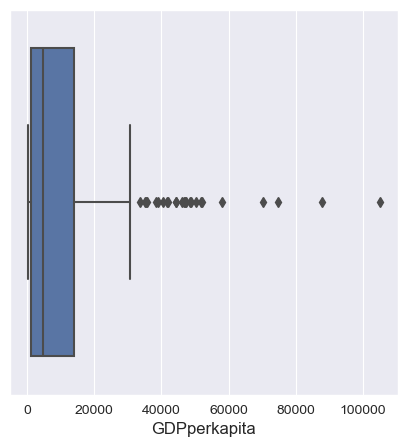

In [20]:
sns.set({'figure.figsize':(5,5)})
sns.boxplot(x='GDPperkapita', data=df)

<AxesSubplot:xlabel='Kematian_anak'>

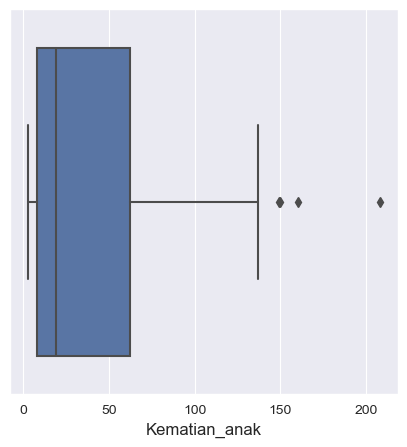

In [21]:
sns.set({'figure.figsize':(5,5)})
sns.boxplot(x='Kematian_anak', data=df)

Berdasarkan visualisasi box plot diatas, terdapat beberapa kolom yang memiliki outlier. Untuk meminimalisir tejadinya outlier, maka akan dilakukan teknik untuk menghandling outlier pada kolom tersebut. Cara yang dilakukan adalah kita menghapus nilai outliernya berdasarkan range nilai tertentu.

### Handle outliers menggunakan metode Interquartile range

`#Trial dengan Standard Deviation
def remove_outlier_IQR(df):
    df = pd.DataFrame(data = df, columns = ['GDPperkapita', 'Kematian_anak'])
    two_sd = df.std() *2
    three_sd = df.std() *3
    df_final = df[~((df<(np.mean(df) - three_sd)) | (df>(np.mean(df) + three_sd)))]
    return df_final`

In [22]:
#metode Interquartile range
def remove_outlier_IQR(df):
    Q1 = df.quantile(0.08)
    Q3 = df.quantile(0.58)
    IQR = (Q3 - Q1)
    df_final = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
    return df_final

In [23]:
df_outlier_removed = remove_outlier_IQR(df[['GDPperkapita','Kematian_anak']])
df_outlier_removed.dropna(axis=0, inplace=True)

In [24]:
df_outlier_removed

GDPperkapita  Kematian_anak
1            4090           16.6
2            4460           27.3
4           12200           10.3
5           10300           14.5
6            3220           18.1
..            ...            ...
161          1380           36.3
162          2970           29.2
163         13500           17.1
164          1310           23.3
165          1310           56.3

[84 rows x 2 columns]

### Boxplot features setelah di handling outliers 

<AxesSubplot:xlabel='GDPperkapita'>

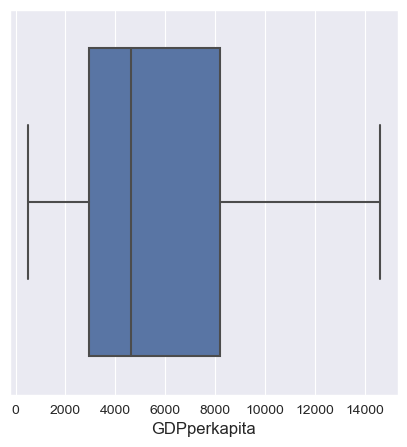

In [25]:
sns.set({'figure.figsize':(5,5)})
sns.boxplot(x='GDPperkapita', data=df_outlier_removed)

<AxesSubplot:xlabel='Kematian_anak'>

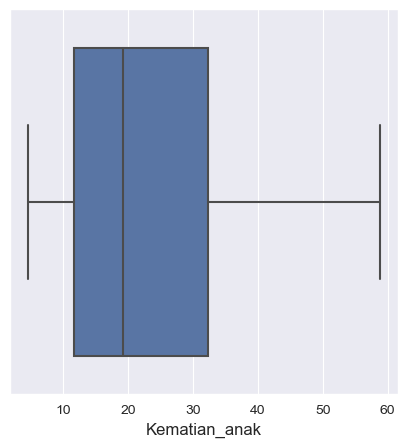

In [26]:
sns.set({'figure.figsize':(5,5)})
sns.boxplot(x='Kematian_anak', data=df_outlier_removed)

# G. Scalling Data

Pada projek ini digunakan data scaler; Standard Scaler

In [27]:
sc = StandardScaler()
dfoutlier_std = sc.fit_transform(df_outlier_removed.astype(float))

new_dfoutlier_std = pd.DataFrame(data = dfoutlier_std, columns = ['GDPperkapita', 'Kematian_anak'])

# H. Clustering Data

## Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan..

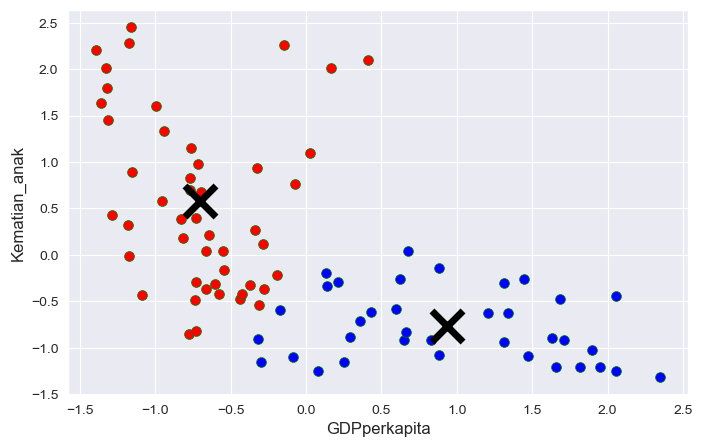

In [28]:
kmeans1 = KMeans(n_clusters=2, random_state=42).fit(dfoutlier_std)
labels1 = kmeans1.labels_ 
new_dfoutlier_std['label_kmeans1'] = labels1

plt.figure(figsize=(8,5))
plt.scatter(new_dfoutlier_std.GDPperkapita[new_dfoutlier_std.label_kmeans1 == 0], new_dfoutlier_std['Kematian_anak'][new_dfoutlier_std.label_kmeans1 == 0], c='red', s = 50, edgecolor='green', linestyle='-')
plt.scatter(new_dfoutlier_std.GDPperkapita[new_dfoutlier_std.label_kmeans1 == 1], new_dfoutlier_std['Kematian_anak'][new_dfoutlier_std.label_kmeans1 == 1], c='blue', s = 50, edgecolor='green', linestyle='-')
                                                                                                                
centers = kmeans1.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, marker='x',lw=5)
plt.xlabel('GDPperkapita')
plt.ylabel('Kematian_anak')
plt.show()

## Dengan menggunakan **n-clusters (Elbow Method)** untuk menentukan jumlah cluster yang tepat

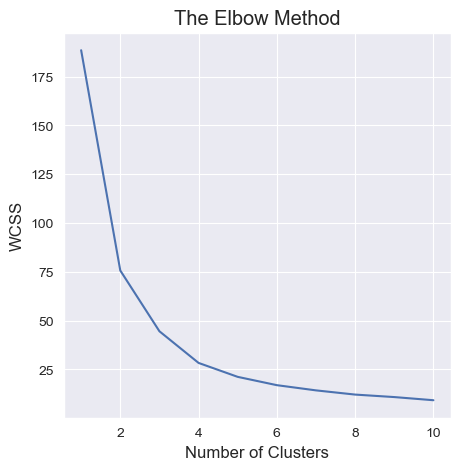

In [29]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 42)
    kmeans.fit(new_dfoutlier_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')    
plt.show()

**Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan**

In [30]:
kmeans2 = KMeans(n_clusters=3, init='k-means++', random_state=42).fit(dfoutlier_std)
kmeans2.labels_

array([0, 0, 1, 1, 0, 2, 2, 0, 0, 2, 2, 0, 2, 1, 0, 2, 0, 1, 0, 0, 1, 1,
       2, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 1, 2, 2, 0, 2, 0, 0, 1, 2, 1, 1,
       1, 1, 0, 1, 0, 1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 2, 1, 1, 1, 0, 0,
       1, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 2])

**visualisasi berdasarkan cluster 3**

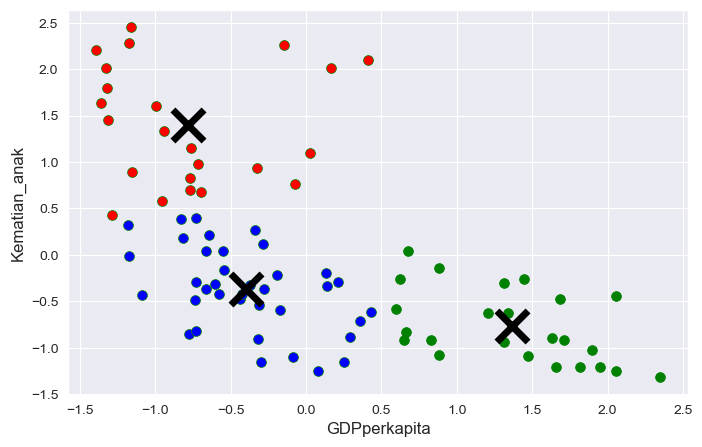

In [31]:
labels2 = kmeans2.labels_

new_dfoutlier_std['label_kmeans2'] = labels2

plt.figure(figsize=(8,5))
plt.scatter(new_dfoutlier_std.GDPperkapita[new_dfoutlier_std.label_kmeans2 == 0], new_dfoutlier_std['Kematian_anak'][new_dfoutlier_std.label_kmeans2 == 0], c='blue', s = 50, edgecolor='green', linestyle='-')
plt.scatter(new_dfoutlier_std.GDPperkapita[new_dfoutlier_std.label_kmeans2 == 1], new_dfoutlier_std['Kematian_anak'][new_dfoutlier_std.label_kmeans2 == 1], c='green', s = 50, edgecolor='green', linestyle='-')
plt.scatter(new_dfoutlier_std.GDPperkapita[new_dfoutlier_std.label_kmeans2 == 2], new_dfoutlier_std['Kematian_anak'][new_dfoutlier_std.label_kmeans2 == 2], c='red', s = 50, edgecolor='green', linestyle='-')

centers = kmeans2.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, marker='x',lw=5)
plt.xlabel('GDPperkapita')
plt.ylabel('Kematian_anak')
plt.show()

## Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut

In [32]:
print(silhouette_score(new_dfoutlier_std, labels=labels1))
print(silhouette_score(new_dfoutlier_std, labels=labels2))

0.4315113329097472
0.5875074622268124


# I. Analisa Data Hasil Clustering

bisa dilihat silhoute koefisien untuk masing2 cluster
- koef silhoute untuk cluster 2 adalah 43,15%
- sedang koef silhoute untuk cluster 3 adalah 58,75%

artinya cluster 3 lebih bisa dibandingkan dan lebih insightful daripada cluster 2.<br>

**Hasilnya;**
- **cluster 0 (Biru)** : GDP Negara Berkembang<br> 
GDP Perkapita dengan nilai -1.5<x<0.5 memiliki rerata tingkat kematian anak yang rendah/masih relatif sedikit, bisa di golongkan kedalam GDP Negara Berkembang
- **cluster 1 (Hijau)** : GDP Negara Maju<br> 
GDP Perkapita dengan nilai x>0.5 tidak memiliki kekhawatiran dengan tingkat kematian anak(x<0), tapi tidak menutup kemungkinan bisa saja terjadi hal tersebut dari lain faktor. Range GDP ini bisa di golongkan kedalam GDP Negara Maju. 
- **cluster 2 (Merah)** : GDP Negara Terbelakang<br>
GDP Perkapita dengan nilai x<0 memiliki rerata tingkat kematian anak yang relatif tinggi(x>0), hal ini menunjukkan gdp rendah berbanding terbalik dengan kematian anak. Range GDP tersebut bisa di golongkan kedalam GDP Negara Terbelakang

<b>Jadi, bisa disimpulkan bahwa GDP suatu negara berbanding terbalik dengan tingkat kematian anak.
><b>Semakin tinggi GDP perkapita pada suatu negara, semakin rendah pula tingkat kematian anak, begitu juga sebaliknya.<br>
Semakin rendah GDP perkapita pada suatu negara, semakin tinggi pula tingkat kematian anak

# J. Rekomendasi negara penerima bantuan

In [33]:
new_dfoutlier_std.describe().T

count          mean       std       min       25%       50%  \
GDPperkapita    84.0  6.872809e-17  1.006006 -1.391220 -0.741863 -0.291840   
Kematian_anak   84.0  2.960595e-16  1.006006 -1.315452 -0.819401 -0.299068   
label_kmeans1   84.0  4.285714e-01  0.497844  0.000000  0.000000  0.000000   
label_kmeans2   84.0  8.333333e-01  0.833534  0.000000  0.000000  1.000000   

                    75%       max  
GDPperkapita   0.653869  2.346087  
Kematian_anak  0.609781  2.451760  
label_kmeans1  1.000000  1.000000  
label_kmeans2  2.000000  2.000000

In [34]:
df.head(5)

Negara  Kematian_anak  Ekspor  Kesehatan  Impor  Pendapatan  \
0          Afghanistan           90.2    10.0       7.58   44.9        1610   
1              Albania           16.6    28.0       6.55   48.6        9930   
2              Algeria           27.3    38.4       4.17   31.4       12900   
3               Angola          119.0    62.3       2.85   42.9        5900   
4  Antigua and Barbuda           10.3    45.5       6.03   58.9       19100   

   Inflasi  Harapan_hidup  Jumlah_fertiliti  GDPperkapita  
0     9.44           56.2              5.82           553  
1     4.49           76.3              1.65          4090  
2    16.10           76.5              2.89          4460  
3    22.40           60.1              6.16          3530  
4     1.44           76.8              2.13         12200

**kriteria: kita bisa mendapatkan negara yang berhak menerima bantuan dengan mencari nilai antara min dari GDPperkapita dan max dari Kematian anak, lalu diurut secara ascending**

### Grouping negara berdasarkan kriteria

In [35]:
gdpmin = df.groupby('Negara').agg({'GDPperkapita':'min','Kematian_anak':'max'}).sort_values(by='GDPperkapita', ascending=True)
kamax = df.groupby('Negara').agg({'GDPperkapita':'min','Kematian_anak':'max'}).sort_values(by='Kematian_anak', ascending=False)
dfmerge = [gdpmin, kamax] 
newdf = pd.concat(dfmerge)
# mencari hanya 3 nilai teratas
newdf = newdf.iloc[:, [0,1]].head(3)
newdf

GDPperkapita  Kematian_anak
Negara                                       
Burundi                    231           93.6
Liberia                    327           89.3
Congo, Dem. Rep.           334          116.0

### Mencari nilai presentasi total bantuan

In [36]:
newdf['Percentage_helper(%)'] = (((newdf['GDPperkapita'] / newdf['Kematian_anak'].sum()) * 100)/3).round(2).apply(lambda x: x + 0.17)
# Show the dataframe
newdf

GDPperkapita  Kematian_anak  Percentage_helper(%)
Negara                                                             
Burundi                    231           93.6                 25.93
Liberia                    327           89.3                 36.64
Congo, Dem. Rep.           334          116.0                 37.42

### Membuat visualisasi 3 Negara paling membutuhkan bantuan

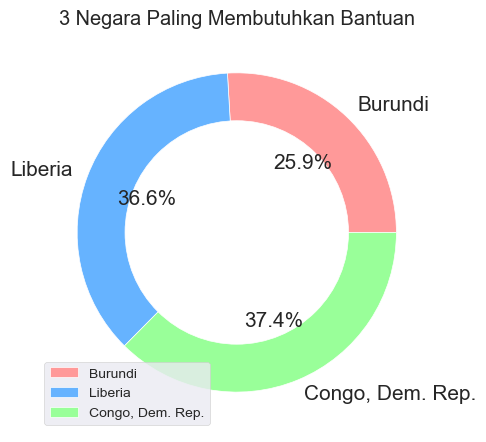

In [37]:
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

newdf.plot(kind='pie', y='Percentage_helper(%)', ylabel='', autopct='%1.1f%%', legend=None,colors=colors,figsize=(5, 5), fontsize=15, title="3 Negara Paling Membutuhkan Bantuan")
plt.legend(loc='lower left')

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

### Mencari Besaran Dana Bantuan Tiap negara

**Dana yang tersedia dari organisasi HELP International adalah $10jt**

In [38]:
newdf["Total_Donate($)"]=newdf.apply(lambda row: (row["Percentage_helper(%)"])*10000000/100, axis=1).astype('int')
newdf.sort_values(by='Total_Donate($)', ascending=False)

GDPperkapita  Kematian_anak  Percentage_helper(%)  \
Negara                                                                
Congo, Dem. Rep.           334          116.0                 37.42   
Liberia                    327           89.3                 36.64   
Burundi                    231           93.6                 25.93   

                  Total_Donate($)  
Negara                             
Congo, Dem. Rep.          3742000  
Liberia                   3664000  
Burundi                   2593000

><b>Kesimpulan:<br>
Berdasarkan hasil exploratory data analysis dengan kmeans clustering dan groupby berdasarkan kategori yang ditentukan diatas, kita dapat membantu CEO untuk memberi keputusan 'negara' mana saja yang paling perlu menjadi fokus perhatian dalam bantuan kali ini, negara berdasarkan cluster 'GDP negara terbelakang' mendapat bantuan dengan total bantuan senilai $10jt. 
>>1. Negara Congo, Dem. Rep. dengan bantuan sebesar \$3.742jt
2. Negara Liberia dengan bantuan sebesar \$3.664jt
3. Negara Burundi dengan bantuan sebesar \$2.5943jt

>math_sum = sum(newdf['Total_Donate($)'])<br>
print(math_sum)<br>
#output: 9999000

### Dokumentasikan ke gitlab
Click here to see: [link push](https://gitlab.com/kenangghalih21/sanber_datascience_41/-/blob/main/tugas/TugasAkhir/EDA_DataNegara.ipynb)